#### The aim of this project is to classify the reasons for crop damage. Its a classification problem and according Exploratory data analysis carried out and appropriate algorithms are built for prdeiction.

Steps followed in the project:

1) Importing the packages/libraries

2) Reading the dataset

3) Checking the shape

4) Checking the info

5) Data cleaning( Treating the missing values, dropping unwanted columns/rows)

6) Exploratory data analysis

7) Label encoding/One hot encoding

8) Outlier treatment

9) Defining X and y(independent and dependent variable)

10) Splitting the data into train and test

11) Fitting different models using GridhSearchCV

12) Checking the metrics for model evaluation

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
df=pd.read_excel("train_agriculture.xlsx")
df1=pd.read_excel("test_agriculture.xlsx")
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [61]:
df1.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [62]:
df.shape

(4599, 10)

In [63]:
df1.shape

(1199, 9)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
ID                         4599 non-null object
Estimated_Insects_Count    4599 non-null int64
Crop_Type                  4599 non-null int64
Soil_Type                  4599 non-null int64
Pesticide_Use_Category     4599 non-null int64
Number_Doses_Week          4599 non-null int64
Number_Weeks_Used          4157 non-null float64
Number_Weeks_Quit          4599 non-null int64
Season                     4599 non-null int64
Crop_Damage                4599 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
ID                         1199 non-null object
Estimated_Insects_Count    1199 non-null int64
Crop_Type                  1199 non-null int64
Soil_Type                  1199 non-null int64
Pesticide_Use_Category     1199 non-null int64
Number_Doses_Week          1199 non-null int64
Number_Weeks_Used          1080 non-null float64
Number_Weeks_Quit          1199 non-null int64
Season                     1199 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [66]:
df.drop('ID',axis=1,inplace=True)

In [67]:
df1.drop('ID',axis=1,inplace=True)

In [68]:
df.Estimated_Insects_Count.value_counts()

1132    193
1212    187
1385    182
1056    180
1478    177
984     162
1678    159
1898    152
677     138
851     134
2267    132
915     128
577     128
448     119
1785    118
1296    109
1576    103
488      98
789      93
531      89
625      89
2015     88
2138     81
732      70
2016     69
2688     67
2840     64
731      63
1786     63
2139     59
       ... 
2541     37
3337     32
3702     30
3164     29
2402     29
411      27
3516     27
188      24
232      24
850      23
3165     21
283      21
209      18
311      18
256      18
3895     18
312      17
150      17
489      15
4096     14
168      13
2687     12
3336     12
257       9
3896      8
3515      7
151       7
169       4
231       4
4097      2
Name: Estimated_Insects_Count, Length: 71, dtype: int64

In [69]:
df.Crop_Type.value_counts()

0    3565
1    1034
Name: Crop_Type, dtype: int64

In [70]:
df1.Crop_Type.value_counts()

0    966
1    233
Name: Crop_Type, dtype: int64

In [71]:
df.Soil_Type.value_counts()

0    2407
1    2192
Name: Soil_Type, dtype: int64

In [72]:
df1.Soil_Type.value_counts()

0    653
1    546
Name: Soil_Type, dtype: int64

In [73]:
df.Pesticide_Use_Category.value_counts()

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64

1-Never
2-Previously used
3-Currently using

In [74]:
df.Number_Doses_Week.value_counts()

20    1211
40     657
30     584
10     537
15     393
5      268
25     263
60     237
50     172
35     101
45      53
0       45
80      36
70      17
55      11
90       5
85       4
65       3
75       1
95       1
Name: Number_Doses_Week, dtype: int64

In [75]:
df['Number_Weeks_Used'].fillna(value=df['Number_Weeks_Used'].median(),inplace=True)

In [76]:
df1['Number_Weeks_Used'].fillna(value=df1['Number_Weeks_Used'].median(),inplace=True)

In [77]:
df.Number_Weeks_Used.value_counts()

28.0    541
20.0    209
30.0    194
25.0    165
40.0    133
35.0    128
26.0    126
15.0    124
24.0    120
17.0    110
22.0    108
29.0    108
18.0    105
23.0    103
34.0    101
27.0     95
32.0     93
19.0     93
33.0     92
37.0     91
38.0     90
10.0     90
31.0     89
16.0     88
21.0     84
36.0     83
14.0     80
12.0     70
45.0     69
42.0     67
       ... 
50.0     62
44.0     57
46.0     48
47.0     47
13.0     45
49.0     41
11.0     41
0.0      40
48.0     39
5.0      33
55.0     27
53.0     26
8.0      26
52.0     25
9.0      24
54.0     24
51.0     23
7.0      22
6.0      20
57.0     19
56.0     17
60.0     11
61.0      9
58.0      9
63.0      5
62.0      5
59.0      5
65.0      3
66.0      3
64.0      1
Name: Number_Weeks_Used, Length: 63, dtype: int64

In [78]:
df1.Number_Weeks_Used.value_counts()

28.0    154
20.0     49
30.0     48
25.0     45
35.0     44
22.0     39
18.0     37
40.0     32
16.0     30
15.0     30
34.0     29
26.0     27
21.0     27
24.0     27
23.0     26
27.0     26
36.0     26
31.0     23
43.0     23
32.0     22
37.0     22
14.0     21
29.0     21
19.0     21
50.0     21
13.0     18
0.0      18
33.0     17
45.0     16
10.0     16
41.0     16
12.0     16
38.0     16
17.0     16
49.0     15
39.0     14
42.0     13
54.0     12
47.0     12
44.0     12
46.0     12
5.0      12
51.0      9
57.0      8
59.0      7
52.0      7
48.0      7
53.0      7
6.0       6
9.0       5
11.0      5
56.0      4
58.0      4
7.0       3
8.0       2
55.0      2
64.0      1
62.0      1
Name: Number_Weeks_Used, dtype: int64

In [79]:
df.Number_Weeks_Quit.value_counts()

0     1496
14     146
2      145
6      140
12     137
15     136
10     134
5      134
1      133
20     131
8      125
3      124
13     123
7      122
9      118
4      117
11     116
16     105
17      94
19      87
18      83
22      83
21      74
23      54
24      52
25      48
28      46
29      41
26      41
27      37
30      34
31      25
32      21
33      16
34      16
35      11
37      11
41       9
38       9
36       8
40       4
39       3
42       3
44       2
43       2
47       2
46       1
Name: Number_Weeks_Quit, dtype: int64

In [80]:
df.Season.value_counts()

2    2327
1    1379
3     893
Name: Season, dtype: int64

In [81]:
df.Crop_Damage.value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

0- Alive
1- Damage due to other reasons
2- Damage due to pesticide

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 9 columns):
Estimated_Insects_Count    4599 non-null int64
Crop_Type                  4599 non-null int64
Soil_Type                  4599 non-null int64
Pesticide_Use_Category     4599 non-null int64
Number_Doses_Week          4599 non-null int64
Number_Weeks_Used          4599 non-null float64
Number_Weeks_Quit          4599 non-null int64
Season                     4599 non-null int64
Crop_Damage                4599 non-null int64
dtypes: float64(1), int64(8)
memory usage: 323.4 KB


In [83]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
Estimated_Insects_Count    1199 non-null int64
Crop_Type                  1199 non-null int64
Soil_Type                  1199 non-null int64
Pesticide_Use_Category     1199 non-null int64
Number_Doses_Week          1199 non-null int64
Number_Weeks_Used          1199 non-null float64
Number_Weeks_Quit          1199 non-null int64
Season                     1199 non-null int64
dtypes: float64(1), int64(7)
memory usage: 75.0 KB


## EDA on train data

In [84]:
df.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

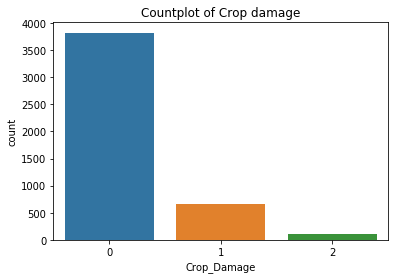

In [85]:
sns.countplot(df['Crop_Damage'])
plt.title("Countplot of Crop damage")
plt.show()

From the above barplot it can be observed that class 0 of crop damage which is 'Alive' is highest followed by 'Damage due to other reasons' and the least is 'Damage due to pesticides'.

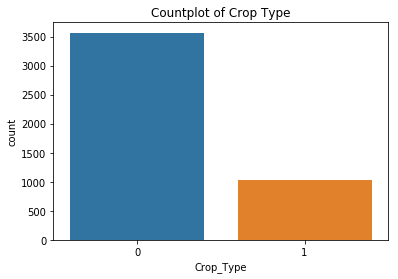

In [86]:
sns.countplot(df['Crop_Type'])
plt.title("Countplot of Crop Type")
plt.show()

From the above countplot we can observe that, Class 0 of crop type are more in number.

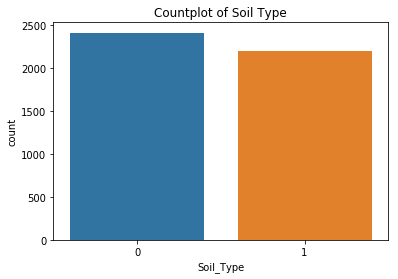

In [87]:
sns.countplot(df['Soil_Type'])
plt.title("Countplot of Soil Type")
plt.show()

From the above countplot we can observe that, Class 0 of soil type are slightly more in number as compared to the other class.

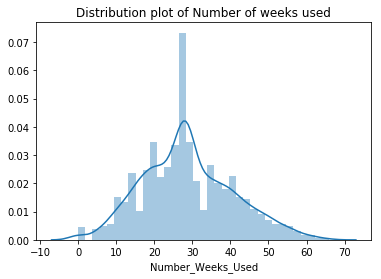

In [88]:
sns.distplot(df['Number_Weeks_Used'])
plt.title("Distribution plot of Number of weeks used")
plt.show()

From the above distribution plot we can see that, Number of weeks used is normally distributed.

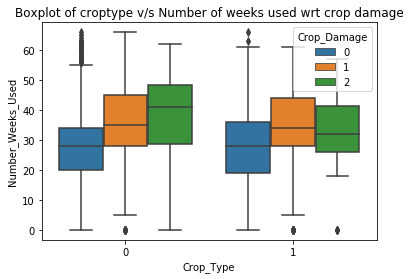

In [89]:
sns.boxplot(df['Crop_Type'],df['Number_Weeks_Used'],hue=df['Crop_Damage'])
plt.title("Boxplot of croptype v/s Number of weeks used wrt crop damage")
plt.show()

From the above boxplot it can be seen that crop type with class 0 have been used more number of weks

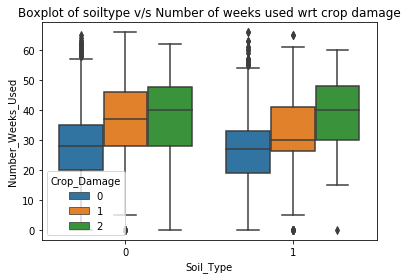

In [90]:
sns.boxplot(df['Soil_Type'],df['Number_Weeks_Used'],hue=df['Crop_Damage'])
plt.title("Boxplot of soiltype v/s Number of weeks used wrt crop damage")
plt.show()

From the above boxplot it can be seen that soil type with class 0 have been used more number of weeks

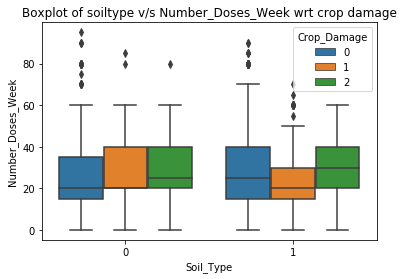

In [91]:
sns.boxplot(df['Soil_Type'],df['Number_Doses_Week'],hue=df['Crop_Damage'])
plt.title("Boxplot of soiltype v/s Number_Doses_Week wrt crop damage")
plt.show()

From the above boxplot it can be seen that soil type with class 1 have been used slightly more number of weeks as compared to class 0.

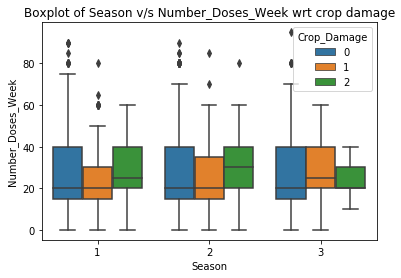

In [92]:
sns.boxplot(df['Season'],df['Number_Doses_Week'],hue=df['Crop_Damage'])
plt.title("Boxplot of Season v/s Number_Doses_Week wrt crop damage")
plt.show()

From the above boxplot it can be seen that, crop damage due t use of pesticides is more in season with class 2 with doeses per week ranging from 25-40.

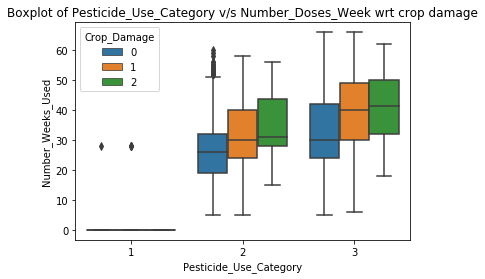

In [93]:
sns.boxplot(df['Pesticide_Use_Category'],df['Number_Weeks_Used'],hue=df['Crop_Damage'])
plt.title("Boxplot of Pesticide_Use_Category v/s Number_Doses_Week wrt crop damage")
plt.show()

From the above boxplot it can be seen that, crop damage is more with pesticide use category which is (currently using) as compared to Pesticide use category 2.

## EDA on test data

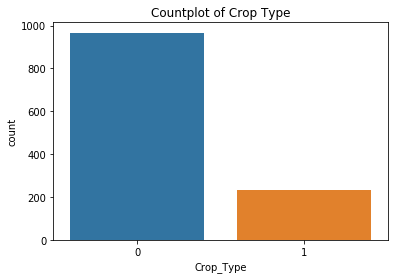

In [94]:
sns.countplot(df1['Crop_Type'])
plt.title("Countplot of Crop Type")
plt.show()

From the above countplot we can observe that, Class 0 of crop type are more in number.

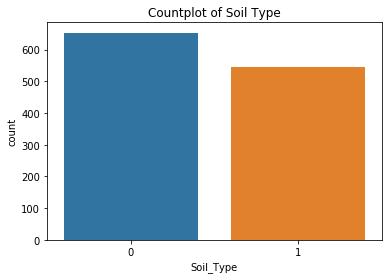

In [95]:
sns.countplot(df1['Soil_Type'])
plt.title("Countplot of Soil Type")
plt.show()

From the above countplot we can observe that, Class 0 of soil type is slightly more in number than class 1 soil type

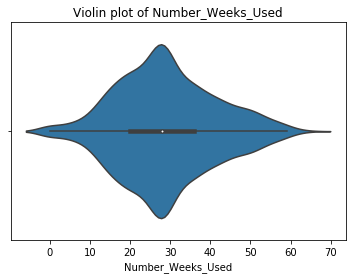

In [96]:
sns.violinplot(df1['Number_Weeks_Used'])
plt.title("Violin plot of Number_Weeks_Used")
plt.show()

From the above violin plot it can be seen that Number_Weeks_Used is normally distributed.

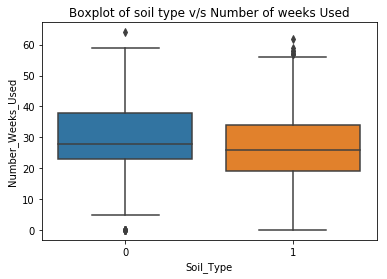

In [97]:
sns.boxplot(df1['Soil_Type'],df1['Number_Weeks_Used'])
plt.title("Boxplot of soil type v/s Number of weeks Used")
plt.show()

From the above boxplot it can be seen that with class 0 of soil type, Number of weeks used is more

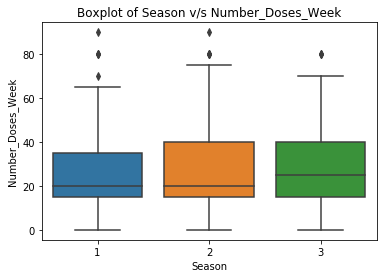

In [98]:
sns.boxplot(df1['Season'],df1['Number_Doses_Week'])
plt.title("Boxplot of Season v/s Number_Doses_Week")
plt.show()

From the above boxplot it can be seen that with class 3 of season, more number of doses week is used.

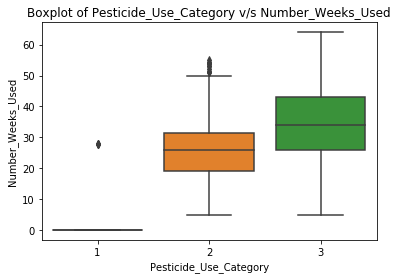

In [99]:
sns.boxplot(df1['Pesticide_Use_Category'],df1['Number_Weeks_Used'])
plt.title("Boxplot of Pesticide_Use_Category v/s Number_Weeks_Used")
plt.show()

From the above boxplot it can be observed that pesticide use category of class 3(Currently using) is being more number of weeks.

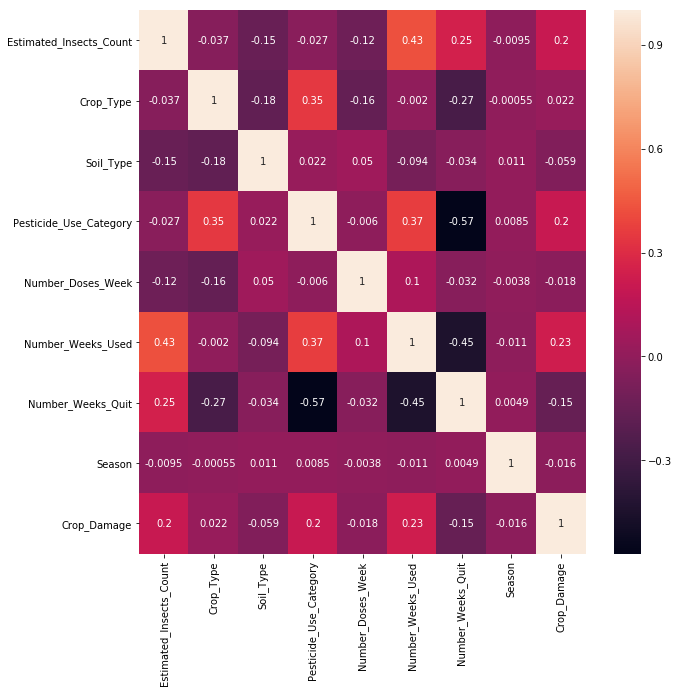

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Crop damage is positively related to Number of weeks used, Pesticide use category and Estimated insects count.
Its negatively correlated with season,number of weeks quit, number of doses week and soil type.

## Checking skewness inorder to check for outliers

In [101]:
df.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.299898
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [102]:
df1.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.245465
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

## Define X and y

In [103]:
X=df.drop('Crop_Damage',axis=1)
X.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [104]:
y=df.Crop_Damage
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Crop_Damage, dtype: int64

In [105]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [106]:
#GridserachCV for Logistic regression
parameters={'C':[1,10],'random_state':range(40,110)}
lg=LogisticRegression()
clf=GridSearchCV(lg,parameters)
clf.fit(X,y)
print(clf.best_params_)

{'C': 1, 'random_state': 40}


In [107]:
#GridsearchCV for Decision Tree
parameters={'criterion':['gini','entropy'],'max_leaf_nodes':[5,50],'random_state':range(40,105)}
dtc=DecisionTreeClassifier()
clf=GridSearchCV(dtc,parameters)
clf.fit(X,y)
print(clf.best_params_)

{'criterion': 'gini', 'max_leaf_nodes': 5, 'random_state': 40}


In [108]:
#GridsearchCV for KNN
parameters={'n_neighbors':range(3,10)}
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(X,y)
print(clf.best_params_)

{'n_neighbors': 8}


In [109]:
#GridsearchCV for XGBoost
parameters={'learning_rate':[0.1,0.15,0.2,0.3,0.4,0.5]}
xgb=XGBClassifier()
clf=GridSearchCV(xgb,parameters)
clf.fit(X,y)
print(clf.best_params_)

{'learning_rate': 0.1}


In [110]:
#Fitting the model with best parameters
LR=LogisticRegression(C=1,random_state=40)
dtc=DecisionTreeClassifier(criterion='gini', max_leaf_nodes=5, random_state= 40)
knn=KNeighborsClassifier(n_neighbors=8)
xgb=XGBClassifier(learning_rate=0.1)

In [111]:
models=[LR,dtc,knn,SVC(),RandomForestClassifier(),xgb]
for m in models:
    m.fit(X,y)
    y_pred=m.predict(X)
    print("fitting",m,"model:\n")
    print("Accuracy :\n",accuracy_score(y,y_pred))
    print("Confusion matrix :\n",confusion_matrix(y,y_pred))
    print("Classification report :\n",classification_report(y,y_pred))

fitting LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=40, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) model:

Accuracy :
 0.8267014568384431
Confusion matrix :
 [[3768   52    0]
 [ 630   34    0]
 [ 107    8    0]]
Classification report :
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      3820
           1       0.36      0.05      0.09       664
           2       0.00      0.00      0.00       115

   micro avg       0.83      0.83      0.83      4599
   macro avg       0.40      0.35      0.33      4599
weighted avg       0.75      0.83      0.76      4599

fitting DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_lea

From the above built models it can be concluded that Random Forest classifier is the best model as its giving the best accuracy,confusion matrix,precision, recall values as compared to other models

In [112]:
#Saving the model
from sklearn.externals import joblib

In [113]:
joblib.dump(RandomForestClassifier(),'Space_server_rfc.pkl')

['Space_server_rfc.pkl']